## Predict wheather student passed math and portuguese course in school or not (Logistic Regresion)

### Information about the dataset

- Number of inputs: **649**
- Number of variables: **30**
- Dataset: https://archive.ics.uci.edu/ml/datasets/student+performance
- Data fields description: https://archive.ics.uci.edu/ml/datasets/student+performance

### Importing main libraries

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings; warnings.simplefilter('ignore')

### Importing the dataset


In [203]:
data_por = pd.read_csv('student-por.csv')
data_math = pd.read_csv('student-mat.csv')

Creates a variable that shows that students passed or did not pass a course (grade>=10 == passed)

In [204]:
#create a variable 'pass'
data_por["Pass"] = [1 if ele >=10 else 0 for ele in data_por["G3"]]
data_math["Pass"] = [1 if ele >=10 else 0 for ele in data_math["G3"]]

y - a variable to predict; creating a list of columns indexes that are categorical, not yet encoded into number, for Label Encoding

In [205]:
y_por = data_por.iloc[:, -1].values
y_mat = data_math.iloc[:, -1].values

### Creating a list of categorical variables and encoding them with LabelEncoder

In [206]:
#encoding categorical variables
categorical_var = [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in categorical_var:
    data_por.iloc[:, i] = labelencoder.fit_transform(data_por.iloc[:, i])

for i in categorical_var:
    data_math.iloc[:, i] = labelencoder.fit_transform(data_math.iloc[:, i])

### Creating a reference dictionary to find corresponding variables after OneHotEncoding in the initial dataframe
This dictionary can be used to find corresponding variables that were chosen by "Forward Selection" and "Backward Elimination" further below

In [207]:
ref_dict_por = {}
dict_iter_por = 0 

ref_dict_mat = {}
dict_iter_mat = 0 

### Encoding categorical variables with OneHotEncoder
The first categorical column will be encoded, result will be added separately in a ndarray, ecluding first dummy column. All other categorical columns will be encoded and added to this ndarray afterwards via loop. That allows to use OneHotEncoder on range of categorical variables without manually encoding one variable after another

In [208]:
col_list = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
no_cat_var = [2,29]

df_cat_por = data_por.iloc[:, col_list]                           #df with categorical variables
df_cat_mat = data_math.iloc[:, col_list]



<b>Portuguese<b>

In [209]:
X_cat = df_cat_por.iloc[:, :].values                        #categorical ndarray
X_cat[:, 0] = labelencoder.fit_transform(X_cat[:, 0])           
onehotencoder = OneHotEncoder(categorical_features = [0])       #encoding 1st column
X_cc = onehotencoder.fit_transform(X_cat).toarray()              
dummy_col = df_cat_por.iloc[:, 0].nunique()                 #finding out number of dummy colummns created

X_cc_2_por = X_cc[:, 1:dummy_col]                                   #moving to a separate ndarray excluding first dummy column

df_cat_no_one = df_cat_por.iloc[:, 1:]                      #first column was preprocessed so it was excuded from further loop
X_cat_no_one = df_cat_no_one.iloc[:, :].values

ref_dict_por[0] = list(range(dict_iter_por, dict_iter_por+dummy_col))     #adding id of original column as key, all corresponding dummy columns as list
dict_iter_por = dict_iter_por + dummy_col



Now the first column was encoded in dummy variables and they were added to separate ndarray. <br>
Other encoded variables will be added to this ndarray via loop below

 Adding other categorical variables to ndarray via loop

In [210]:
dict_iter=0 
for c in range(len(col_list)-1):
    X_cat_no_one[:, c] = labelencoder.fit_transform(X_cat_no_one[:, c])           
    onehotencoder = OneHotEncoder(categorical_features = [c])
    X_cc = onehotencoder.fit_transform(X_cat_no_one).toarray()                    
    dummy_col = df_cat_por.iloc[:, c+1].nunique()                             #+1 because of reffering to df with all categorical variables, including the first one
    X_cc2_2 = X_cc[:, 1:dummy_col]                                                #excluding first dummy column
    X_cc_2_por = np.concatenate((X_cc_2_por, X_cc2_2), axis=1)                            #merge 2 ndarrays
    ref_dict_por[c+1] = list(range(dict_iter, dict_iter+dummy_col))                   #adding id of original column as key, all corresponding dummy columns as list
    dict_iter_por = dict_iter_por + dummy_col

After that all continious variables are added to a ndarray with encoded categorical variables

In [211]:
df_non_categorical = data_por.iloc[:, no_cat_var]
X_no_cat_var = df_non_categorical.iloc[:, :].values
merged_dataset_por = np.concatenate((X_cc_2_por, X_no_cat_var), axis=1)

<b>Math<b>

In [212]:
X_cat = df_cat_mat.iloc[:, :].values                        #categorical ndarray
X_cat[:, 0] = labelencoder.fit_transform(X_cat[:, 0])           
onehotencoder = OneHotEncoder(categorical_features = [0])       #encoding 1st column
X_cc = onehotencoder.fit_transform(X_cat).toarray()              
dummy_col = df_cat_mat.iloc[:, 0].nunique()                 #finding out number of dummy colummns created

X_cc_2_mat = X_cc[:, 1:dummy_col]                                   #moving to a separate ndarray excluding first dummy column

df_cat_no_one = df_cat_mat.iloc[:, 1:]                      #first column was preprocessed so it was excuded from further loop
X_cat_no_one = df_cat_no_one.iloc[:, :].values

ref_dict_mat[0] = list(range(dict_iter_mat, dict_iter_mat+dummy_col))     #adding id of original column as key, all corresponding dummy columns as list
dict_iter_mat = dict_iter_mat + dummy_col



Now the first column was encoded in dummy variables and they were added to separate ndarray. <br>
Other encoded variables will be added to this ndarray via loop below

 Adding other categorical variables to ndarray via loop

In [213]:
dict_iter=0 
for c in range(len(col_list)-1):
    X_cat_no_one[:, c] = labelencoder.fit_transform(X_cat_no_one[:, c])           
    onehotencoder = OneHotEncoder(categorical_features = [c])
    X_cc = onehotencoder.fit_transform(X_cat_no_one).toarray()                    
    dummy_col = df_cat_mat.iloc[:, c+1].nunique()                             #+1 because of reffering to df with all categorical variables, including the first one
    X_cc2_2 = X_cc[:, 1:dummy_col]                                                #excluding first dummy column
    X_cc_2_mat = np.concatenate((X_cc_2_mat, X_cc2_2), axis=1)                            #merge 2 ndarrays
    ref_dict_mat[c+1] = list(range(dict_iter, dict_iter+dummy_col))                   #adding id of original column as key, all corresponding dummy columns as list
    dict_iter_mat = dict_iter_mat + dummy_col

After that all continious variables are added to a ndarray with encoded categorical variables

In [214]:
df_non_categorical = data_math.iloc[:, no_cat_var]
X_no_cat_var = df_non_categorical.iloc[:, :].values
merged_dataset_mat = np.concatenate((X_cc_2_mat, X_no_cat_var), axis=1)

### Final dataset to work with
69 columns

## Creating model to predicting passing a Portuguese course

### Selecting columns to work with
At this point there are 69 columns to choose from for a machine learning model. A subjective selection is not appropriate so two approaches will be used to select a required range of variables for machine learning algorithm. These approaches are "Backward Elimination" and "Forward selection": https://en.wikipedia.org/wiki/Stepwise_regression

Lets start with <b>Backward Elimination<b>:

In [215]:
import statsmodels.formula.api as sm

p=0.05

#imputs for def are: dataset and p-value
def BackwardElimination(merged_dataset, y, p):
    #merged_dataset = np.append(arr = np.ones((np.size(merged_dataset,0),1)).astype(int), values=merged_dataset, axis=1) #np.size(merged_categ,0) - number of rows in numpy array
    #this adds our dataset to a column of one so ones are in the first column (for linear regression)

    #number of columns
    len_list = []                                 #list of indexes of all columns
    for i in range(np.size(merged_dataset,1)+1):
        len_list.append(i)

    
    p = p #p-value for; can be adjusted depending on desired result (default - 0.05)

    end = False
    while end==False:
        regressor_OLS = sm.OLS(endog = y, exog = merged_dataset).fit()
        p_values = regressor_OLS.pvalues
        #enable these prints to see a process of selection in a real time
        #print("P values are: "+str(['%.3f' % i for i in p_values.tolist()]))
        #print("Max p value: "+str(max(p_values)))
        #print("==============================================")
        if max(p_values)<p:
            end = True
            return merged_dataset
        elif max(p_values)>=p:
            p_max_pos = p_values.tolist().index(max(p_values))
            merged_dataset = np.delete(merged_dataset, [p_max_pos], axis=1)

X = BackwardElimination(merged_dataset_por, y_por, p)

### Building a Logisitc Regression model with GridSearch (Backward Elimination)

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y_por)

from sklearn.linear_model import LogisticRegression

C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 5, 10]
penalty=['l1','l2']
param_grid = dict(C=C, penalty=penalty)

#model
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
log_reg = GridSearchCV(classifier, param_grid)

#fit best combination of parameters
log_reg.fit(X_train, y_train) #ravel is needed to convert int to float

y_pred = log_reg.predict(X_test)

In [217]:
print('Grid best parameter (max. accuracy): ', log_reg.best_params_)

Grid best parameter (max. accuracy):  {'C': 0.3, 'penalty': 'l2'}


Train score

In [218]:
log_reg.score(X_train, y_train)

0.8703703703703703

Test score

In [219]:
log_reg.score(X_test, y_test)

0.8834355828220859

### Evaluating a model

<b>Building a Confusion Metrics<b>

In [220]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  5,  17],
       [  2, 139]], dtype=int64)

<b>144</b> were predicted right, while <b>19</b> were predicted wrong. 144/163 = <b>0.88</b>

In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN) Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
from sklearn.model_selection import cross_val_score
print('Accuracy: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='accuracy', cv=3)))
print('Precision: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='precision', cv=3)))
print('Recall: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='recall', cv=3)))
print('F1: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='f1', cv=3)))

Accuracy: [0.86419753 0.85185185 0.83333333]
Precision: [0.86075949 0.87333333 0.8707483 ]
Recall: [1.         0.96323529 0.94117647]
F1: [0.92517007 0.91608392 0.90459364]


 For this particular situation the <b>False Positive Rate</b> is the most important, because it is not an issue that model predicted a failure for a student while he or she passed, but it is an issue if model predicted a "pass" when student will eventually fail.
It is recommended to minimize FPR or <b>to increse Precision</b>

In [222]:
print("False Positive Rate is: {:.2f}".format(1-precision_score(y_test, y_pred)))

False Positive Rate is: 0.11


AUC score

In [223]:
from sklearn.metrics import roc_auc_score
print("Area under the curve score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Area under the curve score: 0.61


<b>Adding results to a table for summarization in the end</b>

In [224]:
model_name=[]
accuracy_col=[]
precision_col=[]
recall_col=[]
f1_col=[]
auc_col=[]

model_name.append("Backward/Por")
accuracy_col.append(accuracy_score(y_test, y_pred))
precision_col.append(precision_score(y_test, y_pred))
recall_col.append(recall_score(y_test, y_pred))
f1_col.append(f1_score(y_test, y_pred))
auc_col.append(roc_auc_score(y_test, y_pred))

<b>Building a precision-recall curve<b>

<IPython.core.display.Javascript object>


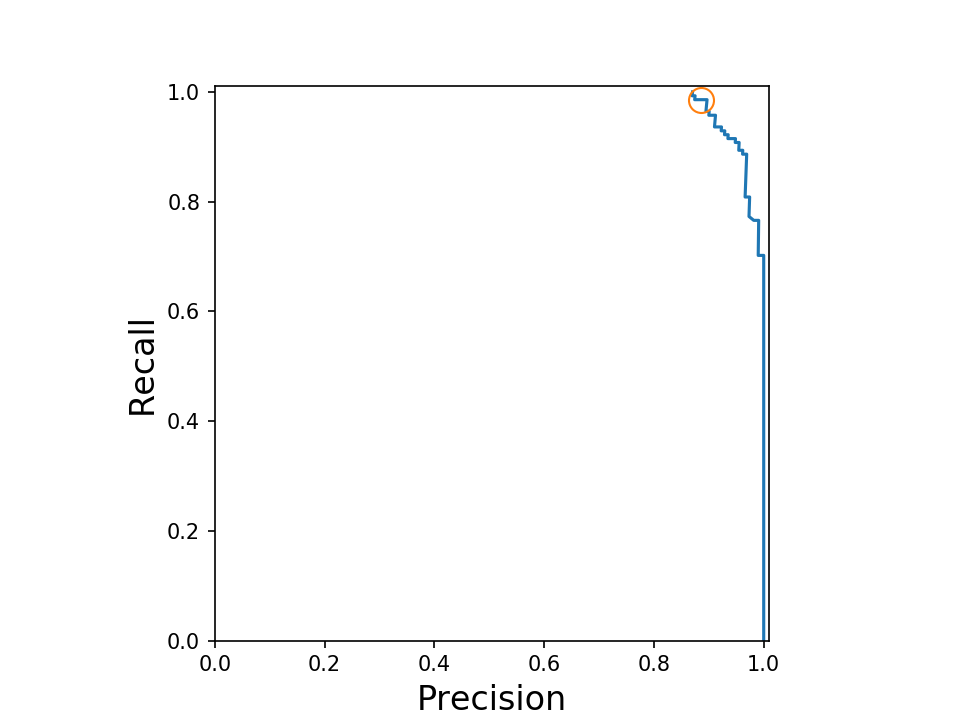

In [225]:
from sklearn.metrics import precision_recall_curve

y_scores_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Precision rises as recall falls

<b>Building a ROC curve</b>

<IPython.core.display.Javascript object>


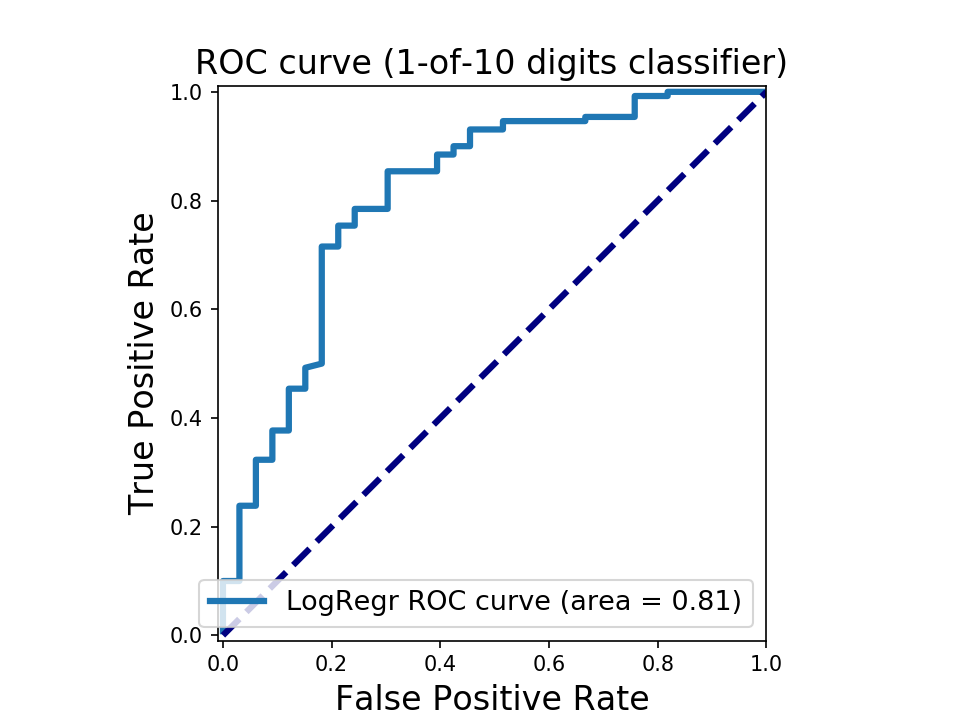

In [226]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_por)

y_pred_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Lets apply <b>Forward Selection<b>:

In [227]:
import statsmodels.formula.api as sm

def ForwardSelection(merged_dataset, y, p):
    unknown_variables = []                  #a list of variables that are not included as "good" ones; after each iteration some variable dissapears from "unknown" and becomes "good"
    for i in range(merged_dataset.shape[1]):
        unknown_variables.append(i)
    
    #adding b0 variable from formula
    #this adds our dataset to a column of one so ones are in the first column (for linear regression)
    #merged_dataset = np.append(arr = np.ones((np.size(merged_dataset,0),1)).astype(int), values=merged_dataset, axis=1) #np.size(merged_categ,0) - number of rows in numpy array
    p = p
    
    ###first iteration is added separately, others in a loop below
    p_values_list=[]
    good_variables=[]
    for i in range(merged_dataset.shape[1]):
        X_opt = merged_dataset[:, i]
        regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()   #finding p value of every variable and y(the variable to predict)
        p_value = regressor_OLS.pvalues
        p_values_list.extend(p_value.tolist())
    min_p_value = min(p_values_list)                            #finding the minimum p value
    min_index = p_values_list.index(min_p_value)                #variable with the smallest p value
    good_variables.append(min_index)                            #add a variable to a "good" list
    unknown_variables.remove(min_index)                         #remove index from a list of "bad" variables
    
    end=False
    while end==False:
        comb_list = []
        p_values_list=[]
        
        #this loop exists to make combinations of "good" variables with every "unknown" to find p value of every combination
        for i in unknown_variables:                            
            temp_list = []
            for t in good_variables:
                temp_list.append(t)
            temp_list.append(i)
            comb_list.append([temp_list])
            #print(temp_list)
        for el in comb_list:
            X_opt = merged_dataset[:, el[0]]
            regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
            p_value = regressor_OLS.pvalues
            pvalue_lst = p_value.tolist()
            p_values_list.append(pvalue_lst[-1])
        #finding combination with min p value
        min_p_value = min(p_values_list)                            
        min_index = p_values_list.index(min_p_value)
        good_variables.append(comb_list[min_index][-1][-1])
        unknown_variables.remove(comb_list[min_index][-1][-1])
        #uncomment to see every step
        #print("Min p value: "+str(min_p_value))
        #print("List of variables: "+str(good_variables))
        #print("####################################")
        if min_p_value>p:
             end=True
        
    #print("UN: "+str(unknown_variables))
    print("GN: "+str(good_variables))
    return merged_dataset[:, good_variables]

In [228]:
p = 0.05
X = ForwardSelection(merged_dataset_por, y_por, p)

GN: [67, 40, 0, 32, 34, 33, 45, 24, 9, 26, 68]


### Building a Logisitc Regression model with GridSearch (Forward Selection)


In [229]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y_por)

from sklearn.linear_model import LogisticRegression

C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 5, 10]
penalty=['l1','l2']
param_grid = dict(C=C, penalty=penalty)

In [230]:
#model
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
log_reg = GridSearchCV(classifier, param_grid)

#fit best combination of parameters
log_reg.fit(X_train, y_train) #ravel is needed to convert int to float

y_pred = log_reg.predict(X_test)

print('Grid best parameter (max. accuracy): ', log_reg.best_params_)

Grid best parameter (max. accuracy):  {'C': 10, 'penalty': 'l1'}


Train score

In [231]:
log_reg.score(X_train, y_train)

0.8662551440329218

Test score


In [232]:
log_reg.score(X_test, y_test)

0.9202453987730062

### Evaluating a model


<b>Building a Confusion Metrics<b>


In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  5,  10],
       [  3, 145]], dtype=int64)

<b>150</b> were predicted right, while <b>13</b> were predicted wrong. 150/163 = <b>0.92</b>


In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN) Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)
from sklearn.model_selection import cross_val_score
print('Accuracy: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='accuracy', cv=3)))
print('Precision: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='precision', cv=3)))
print('Recall: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='recall', cv=3)))
print('F1: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='f1', cv=3)))

Accuracy: [0.85889571 0.83950617 0.85093168]
Precision: [0.85806452 0.88028169 0.87586207]
Recall: [0.99253731 0.93283582 0.95488722]
F1: [0.92041522 0.9057971  0.91366906]


 For this particular situation the <b>False Positive Rate</b> is the most important, because it is not an issue that model predicted a failure for a student while he or she passed, but it is an issue if model predicted a "pass" when student will eventually fail.
It is recommended to minimize FPR or <b>to increse Precision</b>

In [235]:
print("False Positive Rate is: {:.2f}".format(1-precision_score(y_test, y_pred)))

False Positive Rate is: 0.06


AUC score



In [236]:
from sklearn.metrics import roc_auc_score
print("Area under the curve score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Area under the curve score: 0.66


<b>Adding results to a table for summarization in the end</b>


In [237]:
accuracy_col.append(accuracy_score(y_test, y_pred))
precision_col.append(precision_score(y_test, y_pred))
recall_col.append(recall_score(y_test, y_pred))
f1_col.append(f1_score(y_test, y_pred))
auc_col.append(roc_auc_score(y_test, y_pred))

In [238]:
model_name.append("Forward/Por")

<b>Building a precision-recall curve<b>

<IPython.core.display.Javascript object>


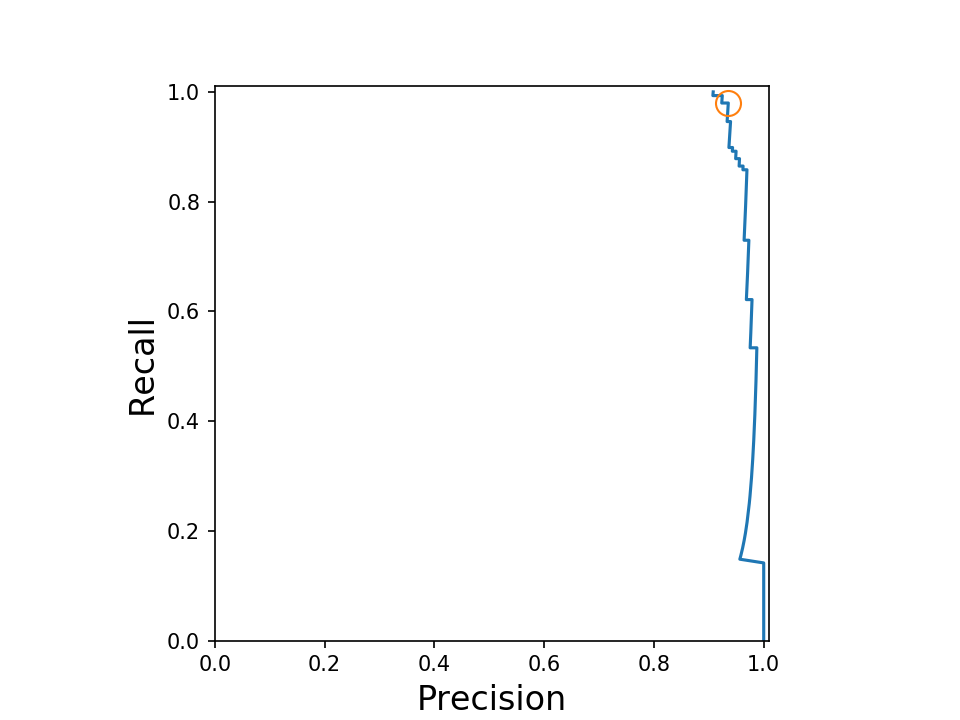

In [239]:
from sklearn.metrics import precision_recall_curve

y_scores_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<b>Building a ROC curve</b>


<IPython.core.display.Javascript object>


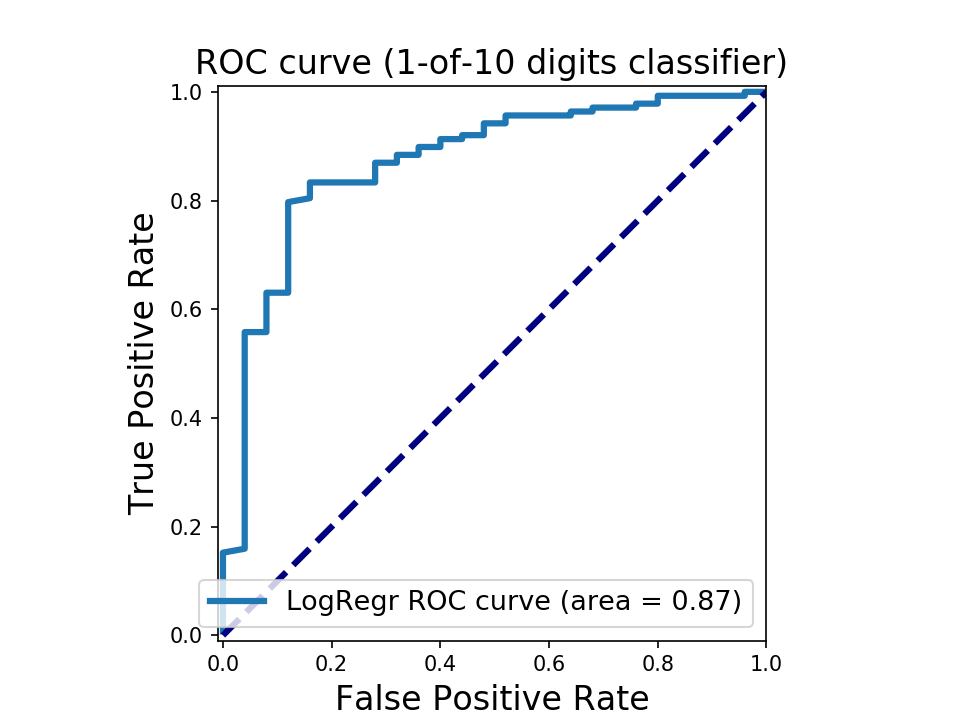

In [240]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_por)

y_pred_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

## Creating model to predicting passing a Math course

Lets start with <b>Backward Elimination</b>

In [241]:
X = BackwardElimination(merged_dataset_mat, y_mat, p)

### Building a Logisitc Regression model with GridSearch (Backward Elimination, Math)

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y_mat)
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 5, 10]
penalty=['l1','l2']
param_grid = dict(C=C, penalty=penalty)
#model
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
log_reg = GridSearchCV(classifier, param_grid)
#fit best combination of parameters
log_reg.fit(X_train, y_train) #ravel is needed to convert int to float
y_pred = log_reg.predict(X_test)
print('Grid best parameter (max. accuracy): ', log_reg.best_params_)

Grid best parameter (max. accuracy):  {'C': 5, 'penalty': 'l2'}


Train score

In [258]:
log_reg.score(X_train, y_train)

0.7297297297297297

Test score

In [259]:
log_reg.score(X_test, y_test)

0.7171717171717171

### Evaluating a model

<b>Cross validation: precision, accuracy, recall and f1<b>


In [260]:
from sklearn.model_selection import cross_val_score
print('Accuracy: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='accuracy', cv=3)))
print('Precision: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='precision', cv=3)))
print('Recall: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='recall', cv=3)))
print('F1: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='f1', cv=3)))

Accuracy: [0.72727273 0.72727273 0.65306122]
Precision: [0.72727273 0.72727273 0.7       ]
Recall: [0.95522388 0.95522388 0.84848485]
F1: [0.82580645 0.82580645 0.76712329]


<b>Building a Confusion Metrics</b>

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12, 22],
       [ 6, 59]], dtype=int64)

<b>71</b> were predicted right, while <b>28</b> were predicted wrong. 71/99 = <b>0.71</b>

 For this particular situation the <b>False Positive Rate</b> is the most important, because it is not an issue that model predicted a failure for a student while he or she passed, but it is an issue if model predicted a "pass" when student will eventually fail.
It is recommended to minimize FPR or <b>to increse Precision</b>

In [262]:
print("False Positive Rate is: {:.2f}".format(1-precision_score(y_test, y_pred)))

False Positive Rate is: 0.27


AUC score

In [263]:
from sklearn.metrics import roc_auc_score
print("Area under the curve score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Area under the curve score: 0.63


<b>Adding results to a table for summarization in the end</b>

In [264]:
model_name.append("Backward/Mat")
accuracy_col.append(accuracy_score(y_test, y_pred))
precision_col.append(precision_score(y_test, y_pred))
recall_col.append(recall_score(y_test, y_pred))
f1_col.append(f1_score(y_test, y_pred))
auc_col.append(roc_auc_score(y_test, y_pred))

<b>Building a precision-recall curve

<IPython.core.display.Javascript object>


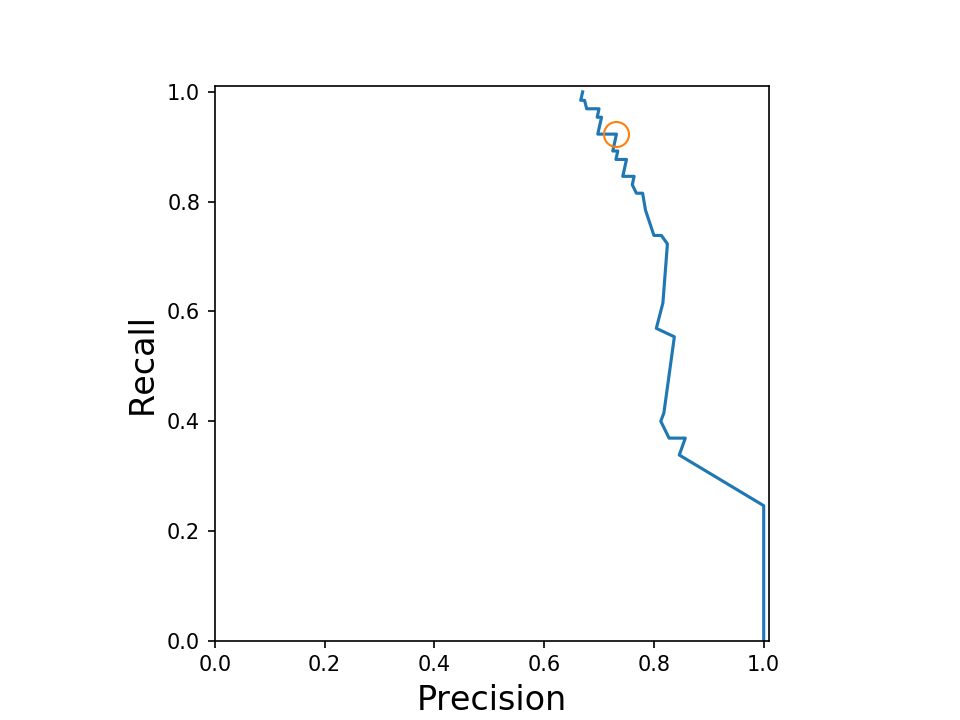

In [265]:
from sklearn.metrics import precision_recall_curve
y_scores_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


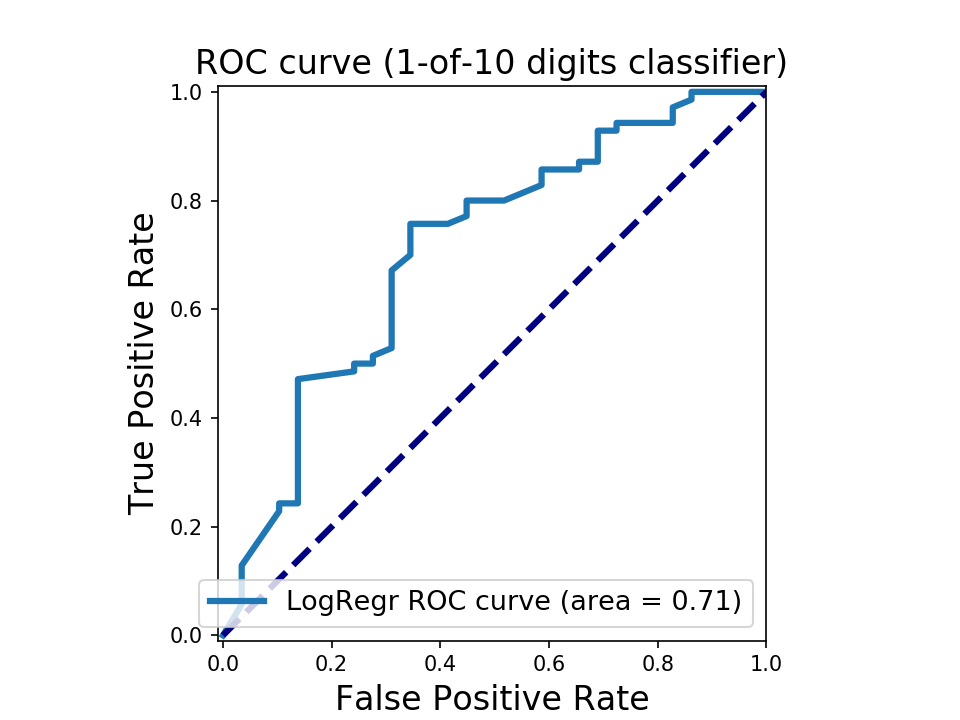

In [180]:
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y_mat)
y_pred_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Lets apply <b>Forward Selection</b>:

In [266]:
p = 0.05
X = ForwardSelection(merged_dataset_mat, y_mat, p)

GN: [40, 33, 51, 1, 32, 52, 15, 34, 67, 13]


### Building a Logisitc Regression model with GridSearch (Forward Selection) (Math)

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y_mat)
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1, 5, 10]
penalty=['l1','l2']
param_grid = dict(C=C, penalty=penalty)
#model
from sklearn.model_selection import GridSearchCV
classifier = LogisticRegression()
log_reg = GridSearchCV(classifier, param_grid)
#fit best combination of parameters
log_reg.fit(X_train, y_train) #ravel is needed to convert int to float
y_pred = log_reg.predict(X_test)
print('Grid best parameter (max. accuracy): ', log_reg.best_params_)

Grid best parameter (max. accuracy):  {'C': 5, 'penalty': 'l2'}


Train score

In [268]:
log_reg.score(X_train, y_train)

0.722972972972973

Test score

In [269]:
log_reg.score(X_test, y_test)

0.7676767676767676

### Evaluating a model

<b>Cross validation: precision, accuracy, recall and f1<b>


In [270]:
from sklearn.model_selection import cross_val_score
print('Accuracy: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='accuracy', cv=3)))
print('Precision: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='precision', cv=3)))
print('Recall: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='recall', cv=3)))
print('F1: '+ str(cross_val_score(log_reg, X_train, y_train.ravel(), scoring='f1', cv=3)))

Accuracy: [0.63       0.69387755 0.67346939]
Precision: [0.68292683 0.70454545 0.68478261]
Recall: [0.8358209  0.93939394 0.95454545]
F1: [0.75167785 0.80519481 0.79746835]


<b>Building a Confusion Metrics

In [271]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14, 19],
       [ 4, 62]], dtype=int64)

<b>76</b> were predicted right, while <b>23</b> were predicted wrong. 76/99 = <b>0.76</b>

 For this particular situation the <b>False Positive Rate</b> is the most important, because it is not an issue that model predicted a failure for a student while he or she passed, but it is an issue if model predicted a "pass" when student will eventually fail.
It is recommended to minimize FPR or <b>to increse Precision</b>

In [272]:
print("False Positive Rate is: {:.2f}".format(1-precision_score(y_test, y_pred)))

False Positive Rate is: 0.23


AUC score

In [273]:
from sklearn.metrics import roc_auc_score
print("Area under the curve score: {:.2f}".format(roc_auc_score(y_test, y_pred)))

Area under the curve score: 0.68


<b>Adding results to a table for summarization in the end

In [274]:
model_name.append("Forward/Mat")
accuracy_col.append(accuracy_score(y_test, y_pred))
precision_col.append(precision_score(y_test, y_pred))
recall_col.append(recall_score(y_test, y_pred))
f1_col.append(f1_score(y_test, y_pred))
auc_col.append(roc_auc_score(y_test, y_pred))

<b>Building a precision-recall curve

<IPython.core.display.Javascript object>


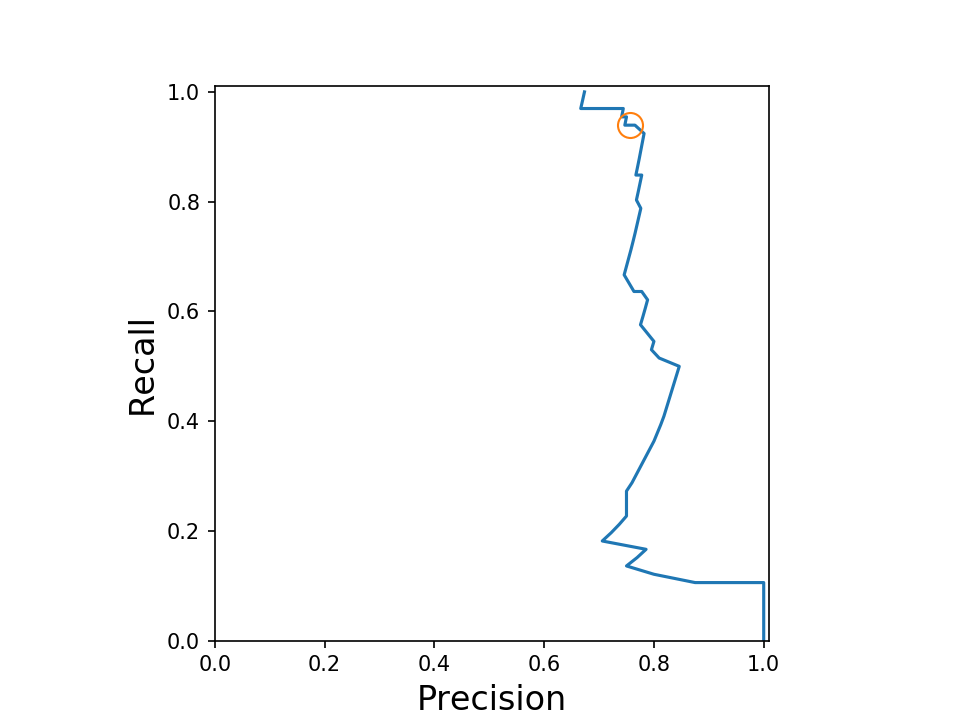

In [275]:
from sklearn.metrics import precision_recall_curve
y_scores_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
%matplotlib notebook
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


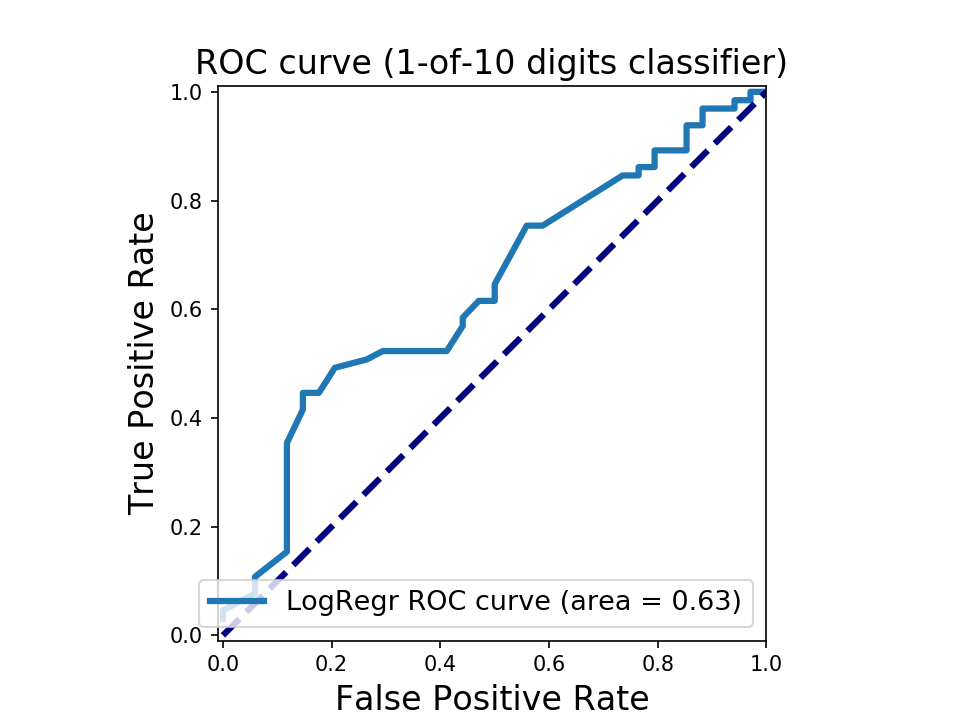

In [200]:
from sklearn.metrics import roc_curve, auc
X_train, X_test, y_train, y_test = train_test_split(X, y_mat)
y_pred_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Summary

<b>A table to compare results

<b>creating a table

In [276]:
d = {'model_name': model_name, 'accuracy_col': accuracy_col, 'precision_col': precision_col,
'recall_col': recall_col, 'f1_col': f1_col, 'auc_col': auc_col}
df = pd.DataFrame(data=d)
df

,accuracy_col,auc_col,f1_col,model_name,precision_col,recall_col
0,0.883436,0.606544,0.936027,Backward/Por,0.891026,0.985816
1,0.920245,0.656532,0.957096,Forward/Por,0.935484,0.979730
2,0.717172,0.630317,0.808219,Backward/Mat,0.728395,0.907692
3,0.767677,0.681818,0.843537,Forward/Mat,0.765432,0.939394
